**TALLER FINAL FINANZAS COMPUTACIONALES 2023**


Integrantes:
1.   Juan David Velasquez Hurtado
2.   Nicolas Lopez Sarmiento
3.   Ricardo Andres Aguilera 


**Caso de aplicación: Portafolio de proyectos y decisión de inversión**

**Base teórica:** criterios de decisiones de inversión (VPN)

Problema a tratar:
La empresa tiene los siguientes proyectos en los que puede invertir 18 millones (USD) en cada año. Cada proyecto tiene un VPN y recursos requeridos para cada año (en millones USD), como se muestra a continuación:

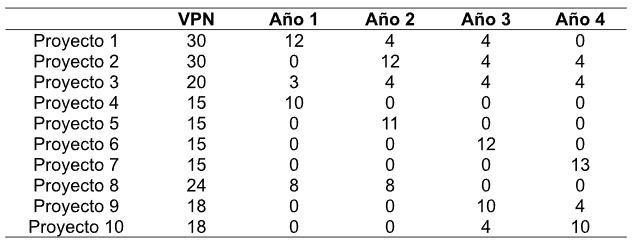

Este caso se trata de una empresa la cual requiere invertir maximo 18 millones anuales en 10 proyectos diferentes durante 4 años, cada proyecto cuenta con un Valor Presente Neto y un costo de financiación anual. Esta empresa quiere maximizar su ganancia invirtiendo en los proyectos mas rentables sin exceder su presupuesto anual, pero para encontrar dicha ganancia debe realizar las diferentes combinaciones de financiación de proyectos con dicho presupuesto, esto le tomaría mucho tiempo por lo que contrata un grupo de programadores para que encuentre en que proyectos debe invertir logrando maximizar su ganancia. 
El objetivo de este trabajo es conseguir un portafolio de inversion el cual tenga la maxima ganancia posible dados los proyectos presentados, para la segund aparte del objetivo se espera ver que pasaría si los valores esperados cambiaran, se espera comprobar que este riesgo no tendrá implicación en los nuevos portafolios ya que convergerá en el mismo portafolio inicial. Esta inversion cuenta con una restriccion anual la cual consta de un presupuesto (prsp) de 18 millones (UDS), es decir, la suma de la financiacion anual no puede ser mayor a este presupuesto. 

Este problema requiere una optimización, el grupo escogió el metodo de cvx ya que es el metodo óptmio para encontrar una combinación que maximice la ganancia, ádemas de esto, el metodo cvx logra introducir las diferentes restricciones de forma matricial, el poder introducir las variables de forma matricial permite que la optimización se realice de forma eficaz. En este caso, se tiene una funcion objetivo de maximizar el valor del VPN total, dos restricciones y dos resultados. Para empezar la funcion objetivo contiene un arreglo donde se encuentran los valores de los VPN, las restricciones son el presupuesto anual y que los proyectos invertidos sean mayor a 1. Esto con lleva a dos resultados, el primero es el portafolio que maximice las ganancias de la empresa, es decir, lo que se buscó encontra fue un metodo por el cual la optimizacion arrojara las mejores inversiones en proyectos para maximar la rentabilidad, esto por medio de un Boolean, es decir, un arreglo de ceros y unos donde el proyecto que de 1 sea el proyecto financiado y el que tenga un 0 sea proyectos que no aportan al portafolio en estas condiciones. El siguiente resultado es la suma del valor de dicha combiancion de proyectos, es decir, la maxima ganancia posible. 

Para la siguiente parte, se espera buscar el mismo portafolio, pero esta asumiendo un riesgo en el valor de estos proyectos, lo cual visto en una pregunta es ¿qué pasaría si el valor de los VPN cambia a lo largo del periodo? Para esto en primera instancia se realizó un arreglo que contenga 1000 diferentes resultados para cada VPN, esto siguiendo una distribución normal que tiene una media que es igual al valor de cada VPN y una desviación que en este caso se tomo de 0.5 para tener un riesgo amplio. Para este ejercicio se toma la descición de meterle otro factor al valor esperado el cual es multiplicar cada VPN por la media de estos VPN, esto con el fin de generar otro valor diferente a los VPN propuestos. Ya que se van a realizar 1000 posibles resultados de VPN es necesario realizar la optimización para estas 1000 posibilidades, por lo que se realiza un bucle en el cual ahorre el resultado uno, el cual hace referencia a mostrar en cuales poryectos se debe invertir, estos resultados se almacenan en una base de datos. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import cvxpy as cp
import warnings
from scipy.stats import norm
!pip install --quiet pyDOE
from pyDOE import lhs
warnings.filterwarnings("ignore") 

  Preparing metadata (setup.py) ... done


a. Formule un programa lineal para encontrar el mejor plan de inversión (proyectos en los
que se recomienda invertir).

In [5]:
# Función objetivo
c = np.array([30, 30, 20, 15, 15, 15, 15, 24, 18, 18])

# Restricciones
                     
Aub = np.array([[12, 0, 3, 10, 0, 0, 0, 8, 0, 0],
                [4, 12, 4, 0, 11, 0, 0, 8, 0, 0],
                [4, 4, 4, 0, 0, 12, 0, 0, 10, 4],
                [0, 4, 4, 0, 0, 0, 13, 0, 4, 10]])

prsp = np.array([18, 18, 18, 18]) 


In [6]:
n = 10
x = cp.Variable(n, boolean=True)
obj = cp.Maximize(c.T @ x)
rest = [Aub @ x <= prsp, x >=0]
prob = cp.Problem(obj, rest)
result = prob.solve()
sol = pd.DataFrame(x.value).round(2)
(sol.T).set_axis(['Proyecto 1','Proyecto 2','Proyecto 3','Proyecto 4','Proyecto 5','Proyecto 6','Proyecto 7','Proyecto 8','Proyecto 9','Proyecto 10',], axis=1)

,Proyecto 1,Proyecto 2,Proyecto 3,Proyecto 4,Proyecto 5,Proyecto 6,Proyecto 7,Proyecto 8,Proyecto 9,Proyecto 10
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


Esta tabla muestra con 1 los proyectos en los cuales puede invertir, y con 0s los que no debe.

In [7]:
result 

86.0

In [22]:
t1 = x.value * c
sum(t1)

86.0

El VPN maximo de los portafolios de inversion, es 86 Millones USD. En este caso result es el valor encontrado por la optimizacion, y t1 es la multiplicacion de los valores de x, los cuales son la descision de inversion de los proyectos, multiplicado por los valores de los VPN, como se puede ver son iguales.

In [12]:
from numpy.matrixlib.defmatrix import matrix
mu = np.array([30, 30, 20, 15, 15, 15, 15, 24, 18, 18])*c.mean()
std = 0.5
rands_n = np.concatenate(((norm(mu[0], std).ppf(lhs(1000,1))),
           norm(mu[1], std).ppf(lhs(1000,1)),
           norm(mu[2], std).ppf(lhs(1000,1)),
           norm(mu[3], std).ppf(lhs(1000,1)),
           norm(mu[4], std).ppf(lhs(1000,1)),
           norm(mu[5], std).ppf(lhs(1000,1)),
           norm(mu[6], std).ppf(lhs(1000,1)),
           norm(mu[7], std).ppf(lhs(1000,1)),
           norm(mu[8], std).ppf(lhs(1000,1)),
           norm(mu[9], std).ppf(lhs(1000,1))))
rands_n

array([[600.30457956, 600.19151014, 600.28448132, ..., 601.2052519 ,
        600.98635702, 600.29457293],
       [601.10318838, 599.37146553, 599.74263763, ..., 599.81734804,
        599.63977105, 600.1204656 ],
       [399.97604946, 400.08565587, 400.7983844 , ..., 399.82049711,
        400.84059882, 399.95802279],
       ...,
       [480.74231236, 479.91415239, 479.52332002, ..., 479.66546305,
        480.17395024, 480.14076372],
       [360.76138284, 360.22124863, 360.10533832, ..., 360.01364294,
        360.70747339, 360.81957223],
       [360.43149694, 360.19048593, 359.73540559, ..., 360.74747434,
        360.18193042, 359.73344872]])

Aqui se genero las distribuciones normales para cada VPN, dando un total de 1000 valores diferentes para cada uno.

In [25]:
m = np.zeros((1000,10))
for i in range(1000):
  n = 10
  y = rands_n[:,i]
  x = cp.Variable(n, boolean=True)
  obj = cp.Maximize(y.T @ x)
  rest = [Aub @ x <= prsp, x >=0]
  prob = cp.Problem(obj, rest)
  result = prob.solve()
  m[i,:] = x.value

m = pd.DataFrame(m)
m

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
996,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
997,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
998,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


En conclusion, se puede ver que el cambiar el posible valor de los VPN con un riesgo alto, terminara encontrando un resultado igual al primer portafolio encontrado.